# 5강: 회귀분석

## 1.상관분석

In [1]:
import pandas as pd

In [6]:
RailTrail = pd.read_csv("/content/RailTrail.csv")
RailTrail.pop("Unnamed: 0")
RailTrail

,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday,dayType
0,83,50,66.5,0,1,0,7.6,0.00,501,True,weekday
1,73,49,61.0,0,1,0,6.3,0.29,419,True,weekday
2,74,52,63.0,1,0,0,7.5,0.32,397,True,weekday
3,95,61,78.0,0,1,0,2.6,0.00,385,False,weekend
4,44,52,48.0,1,0,0,10.0,0.14,200,True,weekday
...,...,...,...,...,...,...,...,...,...,...,...
85,95,66,80.5,0,1,0,4.1,0.00,449,False,weekend
86,65,20,42.5,1,0,0,9.4,0.22,314,False,weekend
87,55,43,49.0,1,0,0,9.0,0.00,264,False,weekend
88,89,57,73.0,0,1,0,1.9,0.00,356,False,weekend


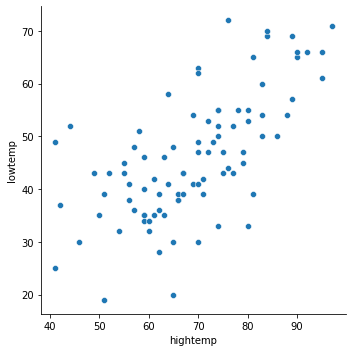

In [7]:
import seaborn as sns
sns.relplot(data=RailTrail, x='hightemp', y='lowtemp')

다음의 그래프:

'x'가 증가하면 'y'도 증가하는 추세는 있지만, 직선 형태라고 보기 어려움
선형은 아니지만 전반적인 추세는 분명히 있음

상관계수(correlation coefficient) almost 0

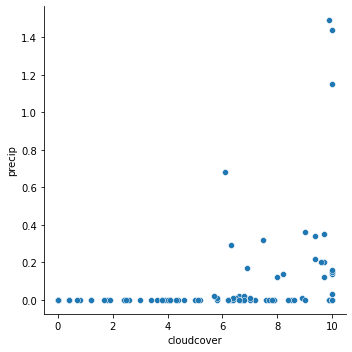

In [8]:
sns.relplot(data=RailTrail, x='cloudcover', y='precip')

In [10]:
#1. 1. 변수 hightemp 와 lowtemp 사이의 상관계수를 구하고, 두 변수 간의 선형상관관계가 유의한지 조사하라.
import scipy.stats as stats
stats.pearsonr(x=RailTrail.hightemp, y=RailTrail.lowtemp)

(0.6598839214492619, 1.5064746341418864e-12)

### 1.3 여러 변수들이 있을 때 (쌍별) 상관관계 조사

상관계수 행렬:

In [12]:
#pandas 데이터 프레임의 모든 수치형 변수에 대한 표본상관관계를 조사하여 행렬의 형태로 정리:
RailTrail.corr()

,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday
hightemp,1.000000,0.659884,0.919644,-0.333338,0.666918,-0.396254,-0.095570,0.134317,0.582572,-0.192122
lowtemp,0.659884,1.000000,0.901960,-0.388733,0.737466,-0.409028,0.365998,0.373796,0.176086,0.038579
avgtemp,0.919644,0.901960,1.000000,-0.394771,0.768772,-0.441538,0.136388,0.272583,0.426854,-0.090249
spring,-0.333338,-0.388733,-0.394771,1.000000,-0.742250,-0.469440,-0.102429,-0.246465,-0.035311,0.072626
summer,0.666918,0.737466,0.768772,-0.742250,1.000000,-0.243252,0.170354,0.340978,0.227417,-0.011908
fall,-0.396254,-0.409028,-0.441538,-0.469440,-0.243252,1.000000,-0.076201,-0.092535,-0.248538,-0.089432
cloudcover,-0.095570,0.365998,0.136388,-0.102429,0.170354,-0.076201,1.000000,0.369149,-0.374562,0.187658
precip,0.134317,0.373796,0.272583,-0.246465,0.340978,-0.092535,0.369149,1.000000,-0.232384,0.072615
volume,0.582572,0.176086,0.426854,-0.035311,0.227417,-0.248538,-0.374562,-0.232384,1.000000,-0.293268
weekday,-0.192122,0.038579,-0.090249,0.072626,-0.011908,-0.089432,0.187658,0.072615,-0.293268,1.000000


In [13]:
#행렬에는 숫자가 많으므로 상관계수의 크기와 방향에 따라 색을 지정하여 시각화
corr = RailTrail.corr()
corr.style.background_gradient(cmap='coolwarm')

,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday
hightemp,1.000000,0.659884,0.919644,-0.333338,0.666918,-0.396254,-0.095570,0.134317,0.582572,-0.192122
lowtemp,0.659884,1.000000,0.901960,-0.388733,0.737466,-0.409028,0.365998,0.373796,0.176086,0.038579
avgtemp,0.919644,0.901960,1.000000,-0.394771,0.768772,-0.441538,0.136388,0.272583,0.426854,-0.090249
spring,-0.333338,-0.388733,-0.394771,1.000000,-0.742250,-0.469440,-0.102429,-0.246465,-0.035311,0.072626
summer,0.666918,0.737466,0.768772,-0.742250,1.000000,-0.243252,0.170354,0.340978,0.227417,-0.011908
fall,-0.396254,-0.409028,-0.441538,-0.469440,-0.243252,1.000000,-0.076201,-0.092535,-0.248538,-0.089432
cloudcover,-0.095570,0.365998,0.136388,-0.102429,0.170354,-0.076201,1.000000,0.369149,-0.374562,0.187658
precip,0.134317,0.373796,0.272583,-0.246465,0.340978,-0.092535,0.369149,1.000000,-0.232384,0.072615
volume,0.582572,0.176086,0.426854,-0.035311,0.227417,-0.248538,-0.374562,-0.232384,1.000000,-0.293268
weekday,-0.192122,0.038579,-0.090249,0.072626,-0.011908,-0.089432,0.187658,0.072615,-0.293268,1.000000


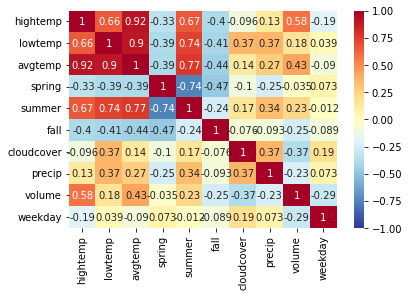

In [14]:
#seaborn 패키지의 heatmap 함수를 이용해 상관계수 행렬을 시각화.

sns.heatmap(corr, annot=True, cmap='RdYlBu_r',
            vmin=-1,
            vmax=1)

## 2.단순 선형회귀분석

* y 변수: 반응변수 (x의 값에 따라 반응하여 달라지는 변수), 내생변수 (endogenous 변수; 시스템 내에서 그 값이 결정되는 변수), 종속변수 (x 의 값에 종속된 변수)
* x 변수: 설명변수 (y를 설명하는 변수), 외생변수(exogenous 변수; 시스템 바깥에서 그 값이 결정되는 변수), 독립변수 (독립적으로 그 값이 정해지는 변수)

.

* 단순선형회귀모형(Simple linear regression model)

### 2.1 회귀계수의 추정

* 평균 제곱 오차를 최소화시키는 B0, B1 을 추정
* 이렇게 구해진 추정량을 최소제곱추정량(Least Square Estimator, LSE)이라 한다.

* Ordinary Least Square(OLS)를 통해 오차의 범위를 계산해 어떤 것이 오차가 가장 작은지 비교

### 2.2 Python에서의 회귀분석 (statsmodels)

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg

* 는 다양한 종류의 통계 모델 피팅, 통계 테스트 수행 그리고 데이터 탐색과 시각화를 위한 파이썬 라이브러리
*좀 더 '전통적인' 빈도주의적 통계 메서드를 포함하고 있음. 베이지안 메서드나 머신러닝 모델은 다른 라이브러리에서 찾을 수 있다.
* 다음과 같은 모델을 포함한다.

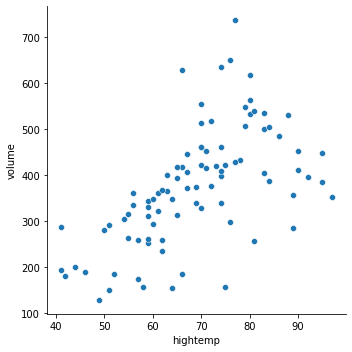

In [16]:
sns.relplot(data=RailTrail, x='hightemp', y='volume')

In [17]:
SMF_model = smf.ols(formula = 'volume~hightemp', data=RailTrail)

In [19]:
SMF_results = SMF_model.fit()
SMF_results. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.71e-09
Time:                        01:45:22   Log-Likelihood:                -544.85
No. Observations:                  90   AIC:                             1094.
Df Residuals:                      88   BIC:                             1099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0793     59.395     -0.288      0.774    -135.115     100.956
hightemp       5.7019      0.848      6.724      0.000       4.017       7.387
==============================================================================
Omnibus:                        3.448   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.964
Skew:                           0.260   Prob(JB):                        0.227
Kurtosis:                       3.721   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# help information = shift + tab

#statsmodels.pi 이용
x = RailTrail.hightemp
x = sm.add_constant(x)
y = RailTrail.volume
x

,const,hightemp
0,1.0,83
1,1.0,73
2,1.0,74
3,1.0,95
4,1.0,44
...,...,...
85,1.0,95
86,1.0,65
87,1.0,55
88,1.0,89


In [26]:
# in summary, the coeff col estimates the coefficients B0 and B1 for linear reg
# here intercept's 계수 B0 = -17.0793, and var hightemp's 계수 B1 = 5.7019
SM_model = sm.OLS(y,x)
SM_results = SM_model.fit()
SM_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.71e-09
Time:                        01:50:46   Log-Likelihood:                -544.85
No. Observations:                  90   AIC:                             1094.
Df Residuals:                      88   BIC:                             1099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0793     59.395     -0.288      0.774    -135.115     100.956
hightemp       5.7019      0.848      6.724      0.000       4.017       7.387
==============================================================================
Omnibus:                        3.448   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.964
Skew:                           0.260   Prob(JB):                        0.227
Kurtosis:                       3.721   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

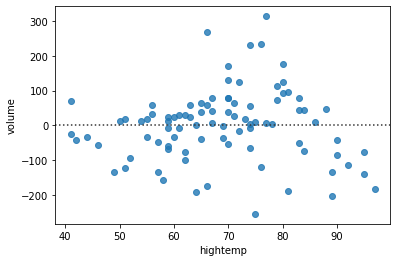

In [27]:
sns.residplot(x='hightemp', y='volume', data=RailTrail)

In [33]:
mod1 = smf.ols('volume~hightemp + lowtemp', data=RailTrail).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     31.02
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           6.76e-11
Time:                        02:21:47   Log-Likelihood:                -539.28
No. Observations:                  90   AIC:                             1085.
Df Residuals:                      87   BIC:                             1092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6672     56.424      0.030      0.976    -110.482     113.817
hightemp       8.0854      1.067      7.578      0.000       5.965      10.206
lowtemp       -3.9712      1.173     -3.385      0.001      -6.303      -1.640
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                7.449
Skew:                           0.327   Prob(JB):                       0.0241
Kurtosis:                       4.249   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x = RailTrail.filter(['hightemp', 'lowtemp', 'cloudcover'])
x = sm.add_constant(x)
mod2 = sm.OLS(y,x).fit()
mod2.params

const         63.291375
hightemp       6.674061
lowtemp       -1.996179
cloudcover    -9.540492
dtype: float64

## 4.Scikit 을 이용한 회귀예측

데이터를 훈련 데이터 (train data)와 테스트 데이터 (test data)로 나누기 위한 sklearn.model_selection.train_test_split

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

 데이터에서 volume 을 hightemp, lowtemp cloudcover, weekday 로 예측하는 회귀모형을 구축하고, 그 예측성능을 평가

In [35]:
x = RailTrail[['hightemp', 'lowtemp', 'cloudcover', 'weekday']]
y = RailTrail.volume

In [36]:
train_test_split(x, y, test_size = 0.2)

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

### 4.2 성능 평가를 위해 훈련데이터와 테스트데이터로 나누기

In [37]:
SEED = 2022
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, random_state=SEED)

In [38]:
x.shape

(90, 4)

In [39]:
x_train.shape

(72, 4)

In [40]:
x_test.shape

(18, 4)

### 4.3 선형 회귀 모델 만든 뒤, 훈련데이터로 적합

In [42]:
# 선형 회귀 모형 만들기
regression = linear_model.LinearRegression()

# 선형 회귀 모델 훈련
regression.fit(x_train, y_train)

LinearRegression()

In [43]:
regression.coef_

array([  7.44199227,  -1.79695068,  -8.07039648, -41.13163431])

In [44]:
regression.intercept_

32.07567775955687

### 4.4 새로운 데이터 예측

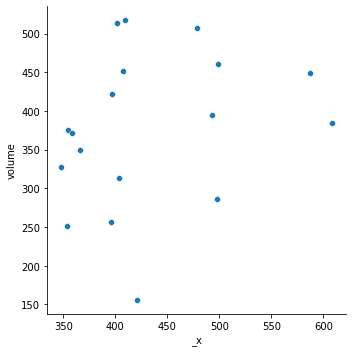

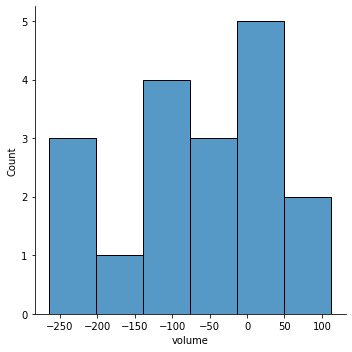

In [55]:
y_pred = regression.predict(x_test)
sns.relplot(x=y_pred, y=y_test)
sns.displot(y_test - y_pred)

### 4.5 예측 성능 수치화하기

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mae

94.17303959312764

In [48]:
mse = mean_squared_error(y_test, y_pred)
mse

#이 숫자들은 상대적이어서 비교해야함?

14573.80610644103

In [51]:
#  RailTrail 데이터로부터 volume 을 예측하는 선형회귀모형을 dayType 과 fall 을 제외한 나머지 변수만을 이용하여 구축하고, test data 에서의 예측오차제곱합을 구하여라.

## model 2
### RailTrail 에서 몇개 빼기
xall = RailTrail.drop(columns = ['volume', 'dayType', 'fall'])
y = RailTrail.volume

## train-test split
xall_train, xall_test, y_train, y_test = train_test_split(xall, y, 
                                                       test_size=0.2, random_state = SEED)

In [52]:
##make reg model
reg = linear_model.LinearRegression().fit(xall_train, y_train)
##make prediction
reg.predict(xall_test)

array([602.36167954, 617.97698027, 418.31419156, 494.37762922,
       431.41480449, 405.28199363, 487.610966  , 390.87657336,
       512.66042194, 370.24800552, 367.97226712, 414.41343673,
       272.28988816, 371.18949428, 329.63958131, 495.30007562,
       372.49391963, 422.34292949])

In [53]:
mean_squared_error(y_pred, y_test)

#두번째 예측모형이 더 좋다

14573.80610644103

# 6강: 기초 기계학습

차원축소, 군집분석

* 데이터에 숨은 패턴을 컴퓨터를 이용하여 찾는 방법, 혹은 특정한 예측을 하기 위한 룰을 컴퓨터를 통해 정하는 방법 


### 지도학습(Supervised Learning)
1. 자료가 반응변수 와 설명변수 로 구성되어 있다.
2. 설명변수가 주어져 있을때, 반응변수의 예측에 목적이 있다

### 비지도학습 (Unsupervised Learning)
1. 반응변수 는 없고 변수들만 있는 경우이다.
2. 예측에는 관심이 없고, 변수들 사이의 특별한 관계가 있는가? 관측치들에 그룹이 있는가 등의 질문에 관심이 있다.
3. 보통 탐색적 자료분석의 일부분이다.
4. 자료분석의 결론이 성능이 좋은지 안좋은지 판단하기가 어렵고, 주관적인 측면이 강하다

seeing if unlabelled data has relatinos within each other?

(여기서는 비지도학습을 할 것)

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns

Decathlon Data 
41명 운동선수들의 10가지 육상종목 기록

In [59]:
track = pd.read_csv('/content/decathlon2004.csv') 
track.shape

(41, 14)

In [ ]:
Penguin Data

In [60]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


얼굴 데이터 Scikit Package

In [61]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.images.shape #pixels

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 64, 64)

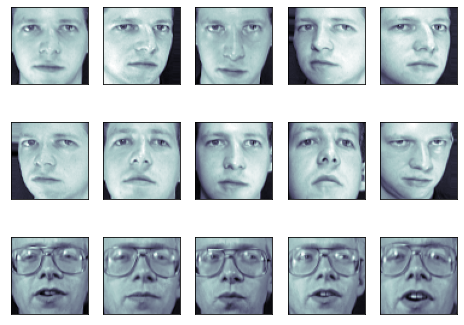

In [63]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

### 1.3 차원축소와 주성분분석

#### 차원축소:
* 위 이미지 데이터는 변수가 1850개 있으므로, 각 이미지가 1850차원 공간의 점. 
* 차원축소: 정보를 많이 잃어버리지 않으면서 데이터의 차원을 줄여서 분석 
* "주성분분석" 이용

.
* 만약 0차원으로 줄인다면? 점!
* 각 4096 개 변수마다 관측값들의 평균으로 이루어진 "평균 이미지"

#### 주성분 분석 (Principal Component Analysis, PCA)
* 여러 개의 다변량 양적변수를 선형결합으로 표시되는 중요한 몇개의 주성분으로 표현하여 전체의 변동을 설명하는 것

* 앞의 얼굴 이미지 데이터는 4096차원의 값들이지만, 차원축소를 하여 30개 차원으로 충분한 정보가 제공이 될까?

* e.g. turning 3 dimension to 2 dimension

like pixelation?

###1.4 Python 주성분분석

sklearn.decomposition 의 PCA 함수 사용

In [64]:
from sklearn.decomposition import PCA

In [65]:
track.head()
track_vars = track.loc[:, '100m' : '1500m']
track_vars.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
1,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
2,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
3,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
4,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


In [66]:
#(1) pca 객체선언+주성분의개수지정
pca = PCA(n_components=2)

#(2) pca 객체를 데이터로 적합 (fitting)
pca.fit(track_vars)

PCA(n_components=2)

In [68]:
#(3) transform 으로 10차원의 데이터를 2차원으로 변환 (차원축소)
track_PC12 = pca.transform(track_vars)

In [70]:
track_PC12 = pd.DataFrame(data = track_PC12, columns = ['PC1', 'PC2'])
track_PC12.head()

,PC1,PC2
0,12.126899,5.319245
1,22.634006,4.818603
2,22.016009,-5.126563
3,0.389697,3.376956
4,-2.856746,5.324504


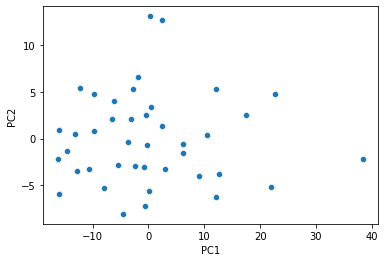

In [73]:
sns.scatterplot(x='PC1', y='PC2', data=track_PC12)

In [71]:
track_vars.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000


#### 변수 표준화 뒤의 주성분 분석

* track 데이터처럼 각 변수의 단위와 변동량이 다를 때는 변동량이 큰 변수가 과대대표되는 경향이 있다. 예를 들어, 100m의 표준편차은 0.2
초, 1500m의 표준편차는 11초, Javeline의 표준편차는 5미터
* 따라서, 변수별 표준화를 통해 각 변수의 변동량을 맞추어줄 필요가 있다. 표준화된 변수값 = (변수값 - 변수의 평균) / (변수의 표준편차)

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
#(1) StandardSacler + pca 객체 선언 + 주성분의 개수 지정
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

In [77]:
#pca_scaled.fit(track_vars)
#pca_scaled.transform(track_vars)

track_PC12 = pca_scaled.fit_transform(track_vars)
track_PC12 = pd.DataFrame(data=track_PC12, columns=['PC1', 'PC2'])
track_PC12.head()

,PC1,PC2
0,0.791628,0.771611
1,1.234991,0.574578
2,1.358215,0.484021
3,-0.609515,-0.874629
4,-0.585968,2.130954


In [78]:
track_all = track.assign(PC1 = track_PC12.PC1,
                         PC2 = track_PC12.PC2)
track_all.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PC1,PC2
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,0.791628,0.771611
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,1.234991,0.574578
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,1.358215,0.484021
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,-0.609515,-0.874629
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,-0.585968,2.130954


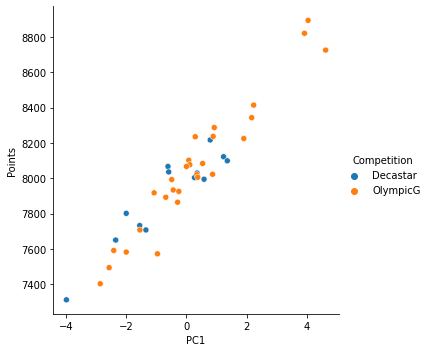

In [79]:
sns.relplot(x = 'PC1', y = 'Points', hue = 'Competition',data = track_all)

연습: do the same for the penguin data

1. pandas 의 함수를 이용해 penguins 데이터의 결측치를 먼저 제거하라.
2. 의 네 수치형 변수의 분포를 조사하여, 변수 표준화가 필요한지를 결정하라. 
3. 주성분의 개수는 2개 이상으로 정하여 차원축소를 한 뒤,
4. 처음의 두 주성분를 이용해 산점도를 그린 뒤, 종과 암수에 대한 정보를 추가한다.

In [80]:
#1 
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [81]:
#결측치 있으면 결측지 제거
penguins_df = penguins_df.dropna()
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [83]:
#2 

# 수치형 변수만을 추출
pen_numeric = penguins_df.iloc[:,2:6]
# `pandas`의 `describe`함수로 분포 조사.
# 표준편차의 (stdev) 차이가 매우 크므로, 표준화할 필요가 있음
pen_numeric. describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [87]:
#3

# 표준화와 주성분분석을 엮어 파이프라인을 만든다.
# n_component = 2 인자를 주거나
# 아래 예처럼 주지 않는다면 n_component를 가장 크게 (이 경우 변수의 수인 4) 정하는 것과 같다.
pca_pen = make_pipeline(StandardScaler(), PCA())

# pca_pen.fit(pen_numeric)
# pc123_pen = pca_pen.transform(pen_numeric)
pc123_pen_allinone = pca_pen.fit_transform(pen_numeric)
pc_df = pd.DataFrame(data = pc123_pen_allinone , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df.head()

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416


In [88]:
sns.relplot(data = pen_PC12.assign(species = penguins_df.species,
                                   sex = penguins_df_sex),
            x = 'PC1', y = 'PC2',
            hue = 'species',
            style = 'sex')

NameError: ignored

## 2.선형판별분석 (Linear Discriminant Analysis)

### 2.1 분류기로서의 선형판별분석

목적:입력변수 _____ 의값으로부터 개의값을가지는범주형변수 의값을예측

예: 펭귄 데이터의 flipper length, bill length,  등의 입력변수로부터 범주형 변수 sex 의 값을 예측

### 2.2 LDA 를 이용한 차원축소

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [92]:
lda = LinearDiscriminantAnalysis(n_components=2)
x=pen_numeric
y=penguins_df.species
lda.fit(x,y)

LinearDiscriminantAnalysis(n_components=2)

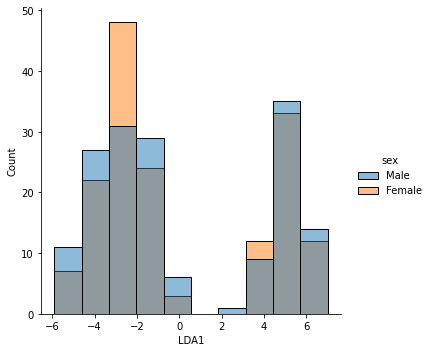

In [96]:
penguins_lda = lda.transform(x)
penguins_lda
pen_lda_df = pd.DataFrame(penguins_lda, columns=['LDA1', 'LDA2'])
pen_lda_df = pen_lda_df.assign(sex = penguins_df.sex)
sns.displot(x='LDA1', data=pen_lda_df, hue='sex')

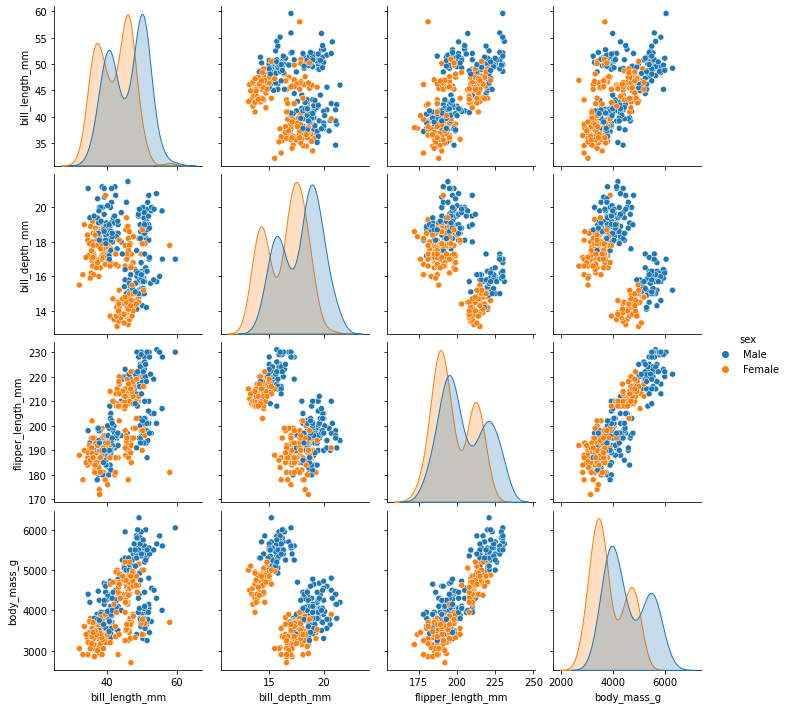

In [97]:
sns.pairplot(penguins_df, hue='sex')

### 3.1 K-means 군집분석

먼저 K개의 군집 중심 을 랜덤하게 지정한다.
1. 군집 지정 c 업데이트: 각각의 관측치를 가장 가까운 군집 중심에 할당한다. 
2. 새롭게 할당된 각 군집마다 새로운 군집 중심 을 계산한다.

군집 지정이 더 이상 바뀌지 않을 때까지 스텝 1과 스텝 2를 반복한다.

In [98]:
X = penguins_df.select_dtypes(np.number)
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) X_scaled. head()

SyntaxError: ignored